In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request
import platform
from time import sleep
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

In [2]:
font_location = 'C:\Windows\Fonts\H2SA1M.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [628]:
def recommend_stock(self):
    addr = "https://finance.naver.com/" + "sise/sise_quant.nhn"
    html = urllib.request.urlopen(addr).read()
    soup = BeautifulSoup(html, "html.parser")
    box = soup.find_all("div", {"class": "box_type_l"})
    trs = soup.find_all("tr")
    for idx, tr in enumerate(trs):
        if idx > 6:
            tds = tr.find_all('a')

            if tds != []:
                code = str(re.findall('[0-9]+', str(tds))[0])
                    # print(re.findall('[0-9]+',str(tds))[0])
                self.top100_trading.append(code)

def env_bit(self):
    print(platform.architecture())
def stock_inform_load(self):
    self.stock_inform_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
    # 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌
    self.stock_inform_df.종목코드 = self.stock_inform_df.종목코드.map('{:06d}'.format)
    # 우리가 필요한 것은 회사명과 종목코드이기 때문에 필요없는 column들은 제외해준다.
    self.stock_inform_df = self.stock_inform_df[['회사명', '종목코드']]
    # 한글로된 컬럼명을 영어로 바꿔준다.
    self.stock_inform_df = self.stock_inform_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
def get_target(self):
    for code,name in zip(self.stock_inform_df.code,self.stock_inform_df.name):
        df = code_load(code)
        #    if len(df) > 17 and df.close[1] != 0 and df.volume.mean() != 0 and df.close[1] !=0:
        #        features = [df.close.diff()[1] / df.close[1] * 100, (df.volume[1] - df.volume.mean()) / df.volume.mean() * 100, (df.high[1] - df.low[1]) / df.close[1] * 100,name]
                # sleep(0.3)
        #        data = pd.DataFrame([features])
        #        self.stock_value.append(data)
        #    else:
        #        pass
        if len(df) > 17:
            if df.close[1] > df.close[2] and df.close[2] > df.close[3] and df.volume[1] > df.volume[2] and \
            df['close'][1] > df['close'].rolling(5).mean()[1] and \
            sum(df.volume.diff()[len(df) - 5:len(df)]) > df.volume.mean() * 1 / 2 and df.volume[1] > df.volume.mean() * 1.2 and df.iloc[:, [1, 6]].corr().iloc[0, 1] > 0.88:
                print("%s : %s원 등락: %s C: %s" % (get_code_name(self.stock_inform_df, code), df.close[1],(df.close[1] - df.close[2]) / df.close[2] * 100,df.iloc[:, [1, 6]].corr().iloc[0, 1]))
        else:
            pass
        #plt.show()
        #self.plot_temp.scatter3D(self.stock_value.iloc[:, 2], self.stock_value.iloc[:, 1], self.stock_value.iloc[:, 0])
        #for i in range(self.stock_value):
        #   self.plot_temp.text(self.stock_value.iloc[i, 2], self.stock_value.iloc[i, 1], self.stock_value.iloc[i, 0], str(self.stock_value.iloc[i,3]))


#sum(df['close'][1:6] > df['close'].rolling(5).mean()[1:6]) == 5 and \
def get_code_name(stock_infrom_df,code):
    code_nm = stock_infrom_df.query("code=='{0}'".format(code))['name'].to_string(index=False)
    return str(code_nm)

def get_name_code(stock_inform_df,name):
    name_cd = stock_inform_df.query("name=='{0}'".format(name))['code'].to_string(index=False)
    return str(name_cd)

def get_code_url(code):
    url = "http://finance.naver.com/item/sise_day.nhn?code="+str(code)
    return url

def code_load(code):
    url = get_code_url(code)
    df = pd.DataFrame()
    #print(code)
    for page in range(1, 30):
        pg_url = url + '&page=' + str(page)
        #print(pg_url)
        df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    df = df.dropna()
    df = df.rename(columns={'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'})
    df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int)
    df['date'] = pd.to_datetime(df['date'])
    df.reset_index(drop=True)
    df = df.sort_values(by=['date'], ascending=True)
    return df

In [4]:

stock_inform_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌
stock_inform_df.종목코드 = stock_inform_df.종목코드.map('{:06d}'.format)
# 우리가 필요한 것은 회사명과 종목코드이기 때문에 필요없는 column들은 제외해준다.
stock_inform_df = stock_inform_df[['회사명', '종목코드']]
# 한글로된 컬럼명을 영어로 바꿔준다.
stock_inform_df = stock_inform_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

In [427]:
def stock_information(code,want):
    addr = 'https://finance.naver.com/item/main.nhn?code='+str(code)
    data = pd.read_html(addr,header=0,encoding='euc-kr')[int(want)]
    return data

In [516]:
# 단위 변환
def cast_int(temp):
    n=len(temp)
    if n==3:
        if temp[1].find(',')==1:
            value= int(temp[0].split('조')[0])*10000+int(temp[1].split(',')[0])*1000+int(temp[1].split(',')[1])
        else :
            value=int(temp[0].split('조')[0])*10000+int(temp[1])
    if n==2:
        if temp[0].find(',')==1:
            value=int(temp[0].split(',')[0])*1000+int(temp[0].split(',')[1])
        else :
            value=int(temp[0])
    return value

20951

In [534]:
def get_market_cap(event):
    data=[]
    for i in range(len(event)):
        value = stock_information(event.code[i],5).columns[1].split()
        value = cast_int(value)
        temp = {'name':event.name[i],'Market_cap':value}
        data.append(temp)
    return pd.DataFrame(data)

In [ ]:
# road_event : 종목별 이름 코드 불러오기  보험=190 생명보험= 192
def road_event(number):
    addr = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no='+str(number)
    event = pd.read_html(addr,header=0,encoding='euc-kr')[2]
    event = event['종목명'].dropna()
    data=[]
    for i in event:
        name=i
        code=get_name_code(stock_inform_df,str(name))
        if code=='Series([], )':
            continue
        else:
            temp={'name': name, 'code': code.split()[0]}
            data.append(temp)
    data=pd.DataFrame(data,columns=['name','code'])
    return data

In [551]:
def Market_pie(number):
    data = road_event(number)
    data = get_market_cap(data)
    plt.rc('font', size=25)
    plt.figure(figsize=(10,10))
    plt.pie(data.Market_cap,labels=data.name,autopct='%.1f%%',)
    plt.show()

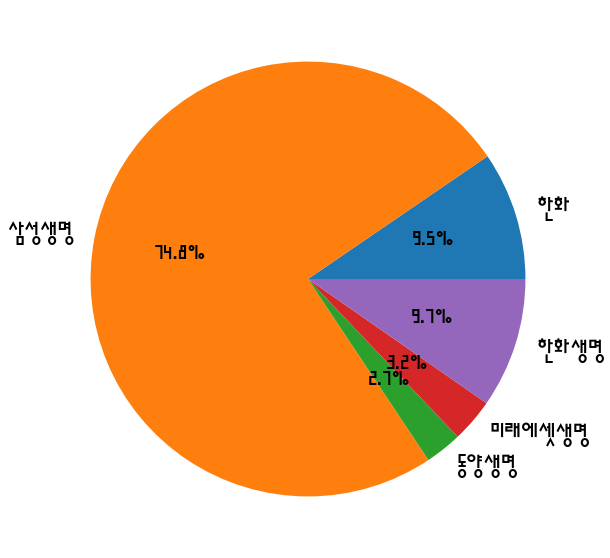

In [552]:
Market_pie(192)

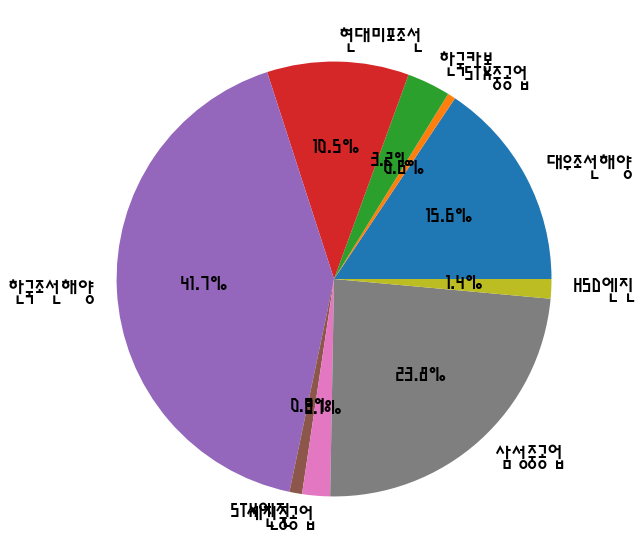

In [610]:
Market_pie(215)

In [561]:
data = []
for i in range(len(lifebohum)):
    load = code_load(lifebohum.code[i])
    temp = { 
        lifebohum.name[i]:load }
    data.append(temp)

In [629]:
samsunglife = code_load(lifebohum.code[1])

In [643]:
samsunglife

,date,close,diff,open,high,low,volume
433,2019-10-28,70900,300,71800,71900,70800,147957
432,2019-10-29,72200,1300,71800,72600,71400,226428
431,2019-10-30,70700,1500,72200,73000,70600,234972
430,2019-10-31,70600,100,70800,71800,70400,184625
429,2019-11-01,70700,100,70300,70800,70100,98091
...,...,...,...,...,...,...,...
5,2020-12-18,75900,0,76000,76100,75200,325280
4,2020-12-21,75800,100,76000,76400,75100,275344
3,2020-12-22,80000,4200,75900,82700,75500,2136409
2,2020-12-23,80500,500,80800,81800,78700,782731


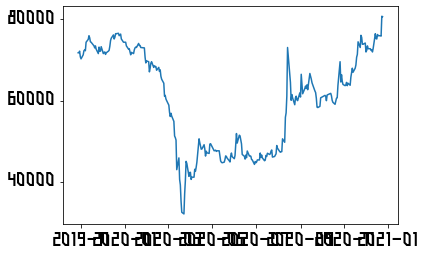

In [631]:
plt.plot(samsunglife.date,samsunglife.open)

In [646]:
x = samsunglife.iloc[:,2:]
y = samsunglife.iloc[:,1]

In [648]:
x

,diff,open,high,low,volume
433,300,71800,71900,70800,147957
432,1300,71800,72600,71400,226428
431,1500,72200,73000,70600,234972
430,100,70800,71800,70400,184625
429,100,70300,70800,70100,98091
...,...,...,...,...,...
5,0,76000,76100,75200,325280
4,100,76000,76400,75100,275344
3,4200,75900,82700,75500,2136409
2,500,80800,81800,78700,782731


In [649]:
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [673]:
#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
test_size = 0.2
idx = len(x)
X_train = x[0:(idx-idx*test_size)].reshape(-1,1)
y_train = y.iloc[0:(idx-idx*test_size),:]
x_test = x[(idx-idx*test_size):]
y_test = y[(idx-idx*test_size):]
lr = LinearRegression() 
lr.fit(X_train, y_train)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [232.0] of <class 'float'>

In [657]:
lr_confidence = lr.score(X_test, y_test)
print("Linear confidence: ", lr_confidence)

Linear confidence:  0.9972127455463909


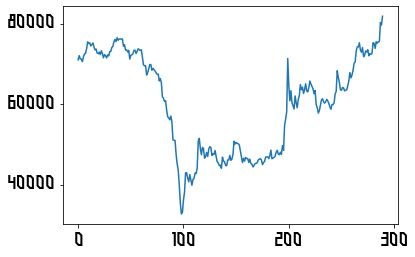

In [676]:
plt.plot(lr.predict(x))

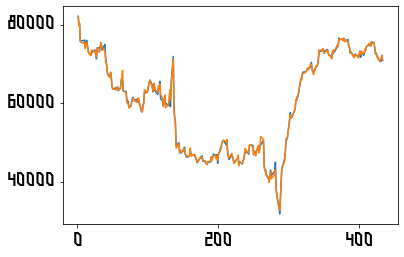

In [690]:

plt.plot(samsunglife.index,samsunglife.close,samsunglife.index,lr.predict(x))

plt.show()

In [702]:
import numpy as np
p=np.array({500,80700,82200,81200,90000})
lr.predict(p)

TypeError: float() argument must be a string or a number, not 'set'

In [693]:
x.tail()

,diff,open,high,low,volume
5,0,76000,76100,75200,325280
4,100,76000,76400,75100,275344
3,4200,75900,82700,75500,2136409
2,500,80800,81800,78700,782731
1,1600,80700,82200,80600,758126
